# Programming assignment 5: spotting cars using convolutional neural networks

Jonas Röst & Kailash de Jesus Hornig  

Deadline: March 9.

In [ ]:
!pip install Pillow

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [51]:
#Installing or importing Keras and Pillow library 
#import keras
import numpy as np
import tensorflow.keras as keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt

In [52]:
# Load images with imageDataGenerator
data_gen = ImageDataGenerator(rescale=1.0/255) # Rescale to black/white (0-1)

#returns a generator object that loads images, transforms them, and returns them in batches of a given size
imgdir = 'a5_images' # or wherever you put them...
img_size = 64
batch_size = 32

train_generator = data_gen.flow_from_directory(
imgdir + '/train',
target_size=(img_size, img_size),
batch_size=batch_size,
class_mode='binary',
classes=['other', 'car'],
seed=12345,
shuffle=True)

Xbatch, Ybatch = train_generator.next()
Xbatch.shape # (32, 64, 64, 3)
Ybatch[0] # first  

Found 1600 images belonging to 2 classes.


1.0

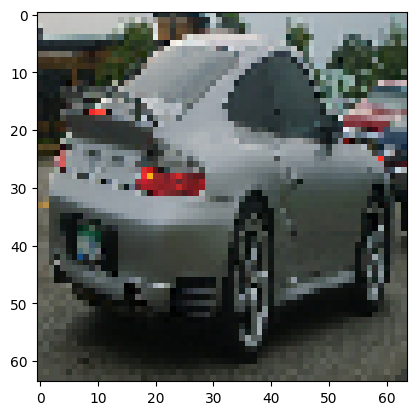

In [9]:
# take a look
plt.imshow(Xbatch[0])
plt.show()

## Part 1: Training a convolutional neural network

In [9]:
def make_convnet():
    # define the input shape
    img_size = 64
    input_shape = (img_size, img_size, 3)

    # create a sequential model
    model = Sequential()

    # add convolutional layers
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2))) # experiment with strides
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2))) # experiment with strides

    # add flatten layer
    model.add(Flatten())

    # add dense layers
    model.add(Dense(128, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    # compile the model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # print the model summary
    model.summary()
    return model 


In [10]:
# the second data generator for validation images
imgdir = 'a5_images' 
img_size = 64
batch_size = 32

valid_generator = data_gen.flow_from_directory(
imgdir + '/validation',
target_size=(img_size, img_size),
batch_size=batch_size,
class_mode='binary',
classes=['other', 'car'],
seed=12345,
shuffle=True)

Found 574 images belonging to 2 classes.


In [11]:
# train first CNN 
epochs = 10 # flattens out after 15

model = make_convnet() # batch_size = 32 default
model.fit(x=train_generator, 
#y should not be specified (since targets will be obtained from x).
        epochs=epochs,
        verbose= 2,
        validation_data = valid_generator
)
#model.save_weights("first_CNN_saved_weights")

2023-03-02 08:23:55.879901: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-03-02 08:23:55.880008: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2023-03-02 08:23:55.880041: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (p-9a2f6166-b39d-417b-9119-b5ef86702171): /proc/driver/nvidia/version does not exist
2023-03-02 08:23:55.881244: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
Model: "sequential"
________________________________________________________

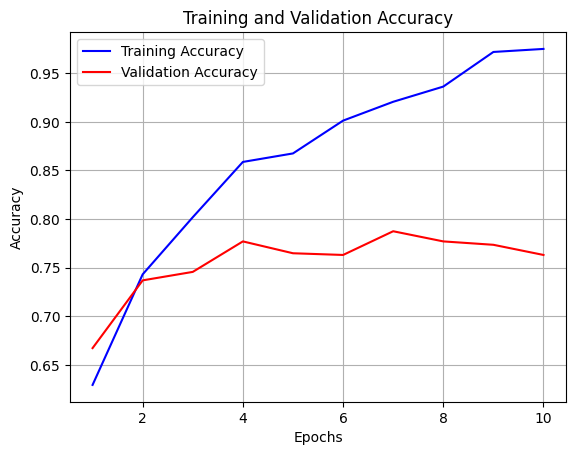

Training accuracy surpasses validation accuracy at epoch 2


In [16]:
# plot training VS validation accuracy 
history = model.history

# extract the training and validation accuracy values
training_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# get the number of epochs
epochs = range(1, len(training_acc) + 1)

# plot the training and validation accuracy curves
plt.plot(epochs, training_acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(visible=True, which='both', axis='both')

plt.show()

# detect the epoch where training accuracy surpasses validation accuracy
for epoch, (acc, val_acc) in enumerate(zip(training_acc, val_acc)):
    if acc > val_acc:
        print(f"Training accuracy surpasses validation accuracy at epoch {epoch + 1}")
        break


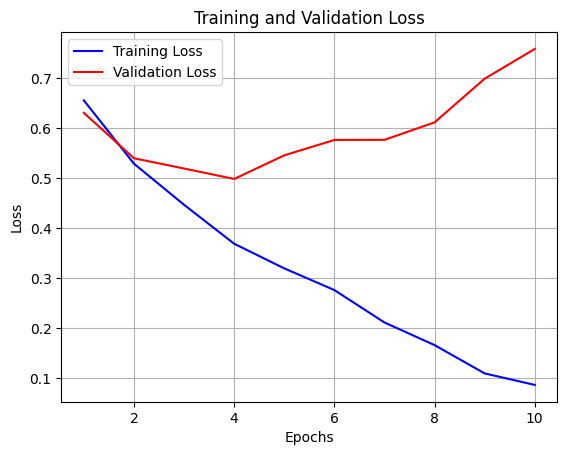

In [17]:
# plot training VS validation loss 
history2 = model.history

# extract the training and validation accuracy values
training_loss = history2.history['loss']
val_loss = history2.history['val_loss']

# get the number of epochs
epochs = range(1, len(training_acc) + 1)

# plot the training and validation accuracy curves
plt.plot(epochs, training_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(visible=True, which='both', axis='both')

plt.show()


In [ ]:
#trying the evalute function
model.evaluate(train_generator)

50/50 [==============================] - 6s 111ms/step - loss: 0.0015 - accuracy: 1.0000


[0.0014568360056728125, 1.0]

In [17]:
# early stopping during training 
model2.fit(x=train_generator, 
#y should not be specified (since targets will be obtained from x).
        epochs=3,
        verbose= 2,
        validation_data = valid_generator
)
#model2.save_weights("saved_weights_CNN")

Epoch 1/3
50/50 - 18s - loss: 0.0012 - accuracy: 1.0000 - val_loss: 1.2667 - val_accuracy: 0.8031 - 18s/epoch - 354ms/step
Epoch 2/3
50/50 - 18s - loss: 0.0010 - accuracy: 1.0000 - val_loss: 1.2840 - val_accuracy: 0.8014 - 18s/epoch - 352ms/step
Epoch 3/3
50/50 - 18s - loss: 8.9507e-04 - accuracy: 1.0000 - val_loss: 1.3002 - val_accuracy: 0.7997 - 18s/epoch - 352ms/step


In [12]:
# how to load weights
#model.load_weights("saved_weights_CNN")

## Part 2: Data augmentation

Found 1600 images belonging to 2 classes.


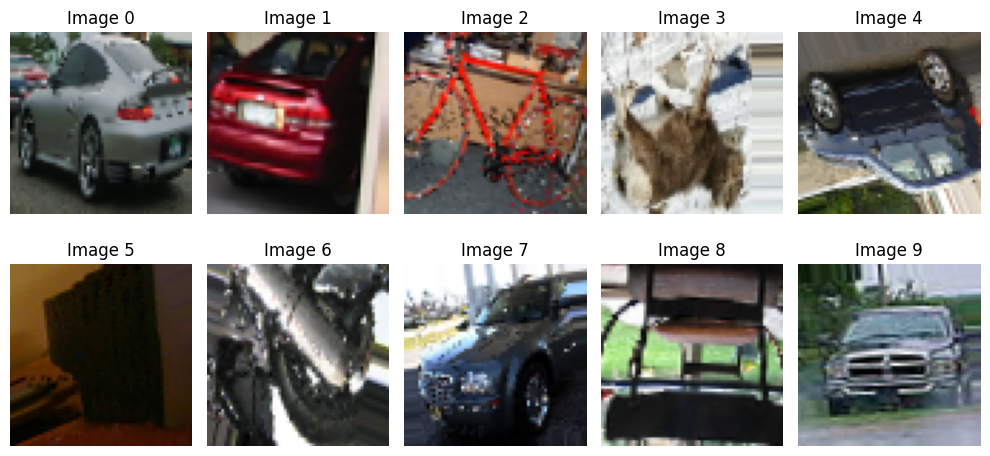

In [21]:
# Load and process images with imageDataGenerator
# augument pictures 
new_data_gen = ImageDataGenerator(
    rescale=1.0/255,# Rescale to black/white (0-1)
    rotation_range=20, # lower to 10% 
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True, # remove
    ) 

img_size = 64
batch_size = 32 #default

new_train_generator = new_data_gen.flow_from_directory(
    'a5_images/train',
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='binary',
    classes=['other', 'car'],
    seed=12345,
    shuffle=True)

Xbatch, Ybatch = new_train_generator.next()

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 5))

for i, ax in enumerate(axes.flat):
    ax.imshow(Xbatch[i])
    ax.set_title(f'Image {i}')
    ax.axis('off')

plt.tight_layout()
plt.show()

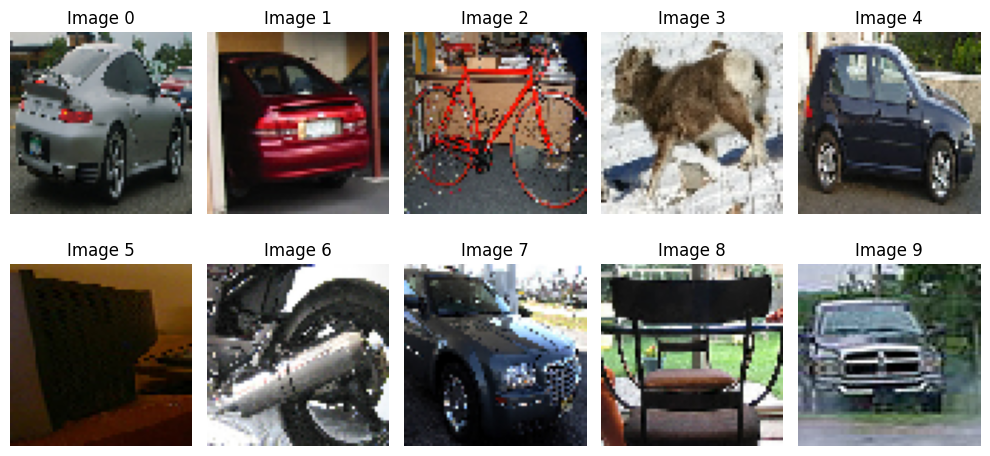

In [6]:
#originals for comparison 
#Xbatch, Ybatch = train_generator.next()
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(Xbatch[i])
    ax.set_title(f'Image {i}')
    ax.axis('off')

plt.tight_layout()
plt.show()

In [22]:
# retrain and evaluate the new model
epochs = 10 #

augmented_model = make_convnet() # batch_size = 32 default
augmented_model.fit(x=new_train_generator, 
#y should not be specified (since targets will be obtained from x).
        epochs=epochs,
        verbose= 1,
        validation_data = valid_generator
)
#model.save_weights("augmented_CNN_saved_weights")



Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 12544)             0         
                                                                 
 dense_4 (Dense)             (None, 128)              

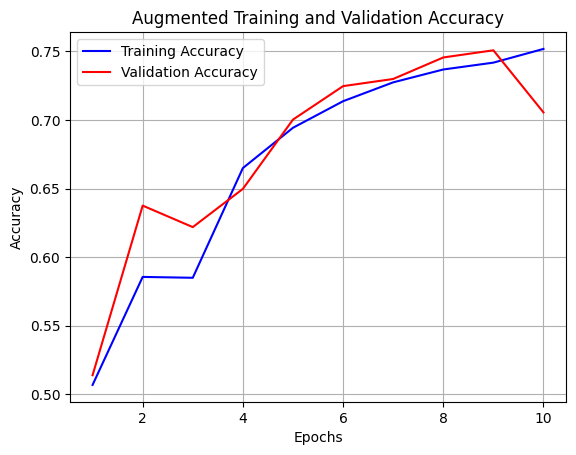

Training accuracy surpasses validation accuracy at epoch 4


In [23]:
# plot training VS validation accuracy 
history = augmented_model.history

# extract the training and validation accuracy values
training_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# get the number of epochs
epochs = range(1, len(training_acc) + 1)

# plot the training and validation accuracy curves
plt.plot(epochs, training_acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Augmented Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# detect the epoch where training accuracy surpasses validation accuracy
for epoch, (acc, val_acc) in enumerate(zip(training_acc, val_acc)):
    if acc > val_acc:
        print(f"Training accuracy surpasses validation accuracy at epoch {epoch + 1}")
        break

From the looks of it, there is no significant improvement on the validation set. The first round without augmentation returned a validation accuracy round 77-78% after the first 10 epochs. Similar was the validation accuracy for the augmented version with 75% at its peak in the first 10 epochs. So a slight decrease actually. As mentioned, the improvement might not be large even when the configuration is made carefully and the validation set is tiny to the effect might not show much.  

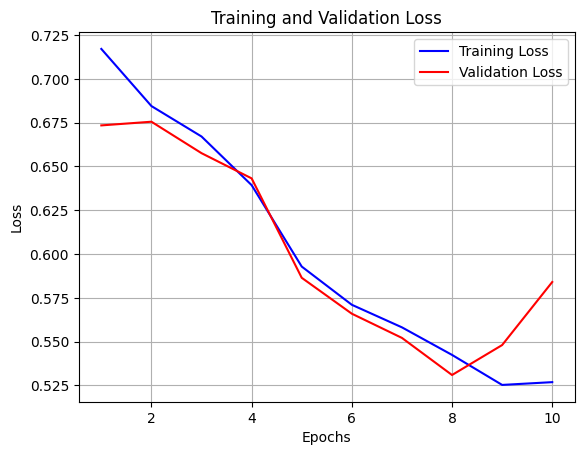

In [25]:
# plot training VS validation loss 
history2 = augmented_model.history

# extract the training and validation accuracy values
training_loss = history2.history['loss']
val_loss = history2.history['val_loss']

# get the number of epochs
epochs = range(1, len(training_acc) + 1)

# plot the training and validation accuracy curves
plt.plot(epochs, training_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.show()

the loss looks weird though...

JONAS TEXT: After having tried several different configurations of the parameters in ImageDataGenerator that have an effect on data augmentation we have come to the conclusion that we can not improve the model a lot. There is not that much of an improvement of the validation accuracy but more of an improvement on the validation loss, approximately 0.1 better loss score. Also, the plots do not show the same signs of overfitting as previously. Both the validation loss and accuracy keeps decreasing as the number of epochs grows. This suggests that the model learns to generalize better after the data augmentation, which was our goal.

### Applying a pre-trained CNN 

In [3]:
from tensorflow.keras import applications
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import decode_predictions, preprocess_input

vggmodel = applications.VGG16(weights='imagenet', include_top=True)

2023-03-03 07:12:23.367230: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-03-03 07:12:23.367281: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2023-03-03 07:12:23.367304: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (p-9a2f6166-b39d-417b-9119-b5ef86702171): /proc/driver/nvidia/version does not exist
2023-03-03 07:12:23.367578: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
553467096/553467096 [==============================] - 3s 0us/st

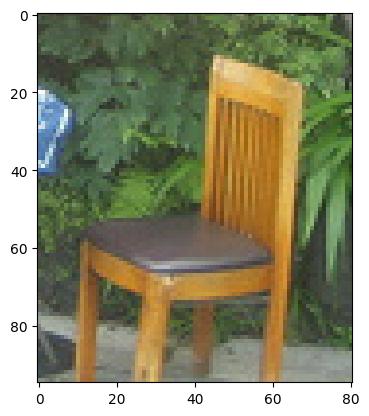

In [48]:
from matplotlib import image as mpimg
im = mpimg.imread('a5_images/validation/other/0019.jpg')
plt.imshow(im)

In [43]:
from PIL import Image

#preprocessing 
pic_name = 'a5_images/validation/other/0019.jpg'
img_obj = keras.utils.load_img(pic_name, target_size=(224,224))
np_array = keras.utils.img_to_array(img_obj)
preprocessed_array = keras.applications.resnet50.preprocess_input(np_array)
img_obj = preprocessed_array.reshape(1, 224, 224, 3) # reshape into 4D, needs to be a batch
pred= vggmodel.predict(img_obj)
print(pred.shape)

#demonstration of the VGG-model 
keras.applications.vgg16.decode_predictions(pred, top=5)

1/1 [==============================] - 0s 421ms/step
(1, 1000)


[[('n03201208', 'dining_table', 0.13564835),
  ('n03376595', 'folding_chair', 0.092048466),
  ('n03899768', 'patio', 0.09166404),
  ('n04099969', 'rocking_chair', 0.04933742),
  ('n04613696', 'yurt', 0.037411854)]]

Yes it makes sense. The image that we choose to classify was of a dining table chair and the most probable classification was "dining table". The second most probable was "folding chair" which is also a good classification of the image. All in all, the top 5 predictions of the image are somewhat related to the image itself which is good. However, the predictions were not completely correct. We do not know if there even is a label "chair" included in the model though.

## Part 3: Using VGG-16 as a feature extractor

Use the VGG-16 model as a feature extractor: we'll apply the convolutional part of the VGG-16 model to our images, and use this output as the input of our own classifier. This solution is an example of transfer learning

In [53]:
# load the VGG-16 model again 
feature_extractor = applications.VGG16(include_top=False, weights='imagenet',
                                       input_shape=(img_size, img_size, 3))
vgg_data_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

# helper method
def create_vgg16_features(): 
    generator = vgg_data_gen.flow_from_directory(
        'a5_images/train',
        target_size=(img_size, img_size),  
        batch_size=batch_size,
        class_mode='binary',
        classes=['other', 'car'],
        seed=1235,
        shuffle=False)
    return generator

# apply VGG-16 model to generator
# get fetures
pred= feature_extractor.predict(create_vgg16_features())
print(pred.shape)



Found 1600 images belonging to 2 classes.
50/50 [==============================] - 43s 848ms/step
(1600, 2, 2, 512)


In [54]:
#store
with open("vgg_cnn_trainfeatures", 'wb') as f:
    np.save(f, pred)

In [55]:
#second round for the validation data
# load the VGG-16 model again 
#feature_extractor = applications.VGG16(include_top=False, weights='imagenet',
#                                       input_shape=(img_size, img_size, 3))
#vgg_data_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

def create_vgg16_features(): 
    generator = vgg_data_gen.flow_from_directory(
        'a5_images/validation',
        target_size=(img_size, img_size),  
        batch_size=batch_size,
        class_mode='binary',
        classes=['other', 'car'],
        seed=12345,
        shuffle=False)
    return generator

# apply VGG-16 model to generator
# get fetures
pred_val= feature_extractor.predict(create_vgg16_features())
print(pred_val.shape)

Found 574 images belonging to 2 classes.
18/18 [==============================] - 15s 842ms/step
(574, 2, 2, 512)


In [56]:
with open("vgg_cnn_validationfeatures", 'wb') as f:
    np.save(f, pred)

In [61]:
def create_vgg16_features(directory):
    # Create generator
    vgg16_generator = vgg_data_gen.flow_from_directory(
            imgdir + '/{}'.format(directory),
            target_size=(img_size, img_size),
            batch_size=batch_size,
            class_mode='binary',
            classes=['other', 'car'],
            seed=12345,
            shuffle=False)
    
    cnn_features = feature_extractor.predict(vgg16_generator)

    with open("cnn_features_{}_final".format(directory), 'wb') as f:
        np.save(f, cnn_features)

create_vgg16_features("train")
create_vgg16_features("validation")

Found 1600 images belonging to 2 classes.
50/50 [==============================] - 46s 925ms/step
Found 574 images belonging to 2 classes.
18/18 [==============================] - 15s 859ms/step


In [60]:
def make_classifier():
    # create a sequential model
    model = Sequential()

    # add flatten layer to convert the outputs from the last VGG-16
    model.add(Flatten())

    # add dense layers
    model.add(Dense(128, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    # compile the model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # print the model summary
    #model.summary()
    return model 

# This help function assumes that all the other instances 
# come before the car instances. Hence shuffle=False before
def get_labels(n):
    return np.array([0]*(n//2) + [1]*(n//2))


def train_on_cnnfeatures(train_file, val_file):
    # read two files
    with open(train_file, 'rb') as f:
        train_data = np.load(f)
    with open(val_file, 'rb') as f:
        val_data = np.load(f)

    #create output labels 
    Y_train = get_labels(len(train_data))
    Y_val = get_labels(len(val_data))

    # trains a classifier on the training set and eval on validation set
    clf  = make_classifier()
    epochs = 5 
    
    clf.fit(x=train_data, 
            y = Y_train,
            epochs=epochs,
            verbose= 1,
            validation_data = (val_data, Y_val))
    clf.save_weights("clf_saved_weights") 
    
    return clf

classifier = train_on_cnnfeatures(train_file="cnn_features_train_final", val_file="cnn_features_validation_final")


FileNotFoundError: [Errno 2] No such file or directory: 'cnn_features_train_final'

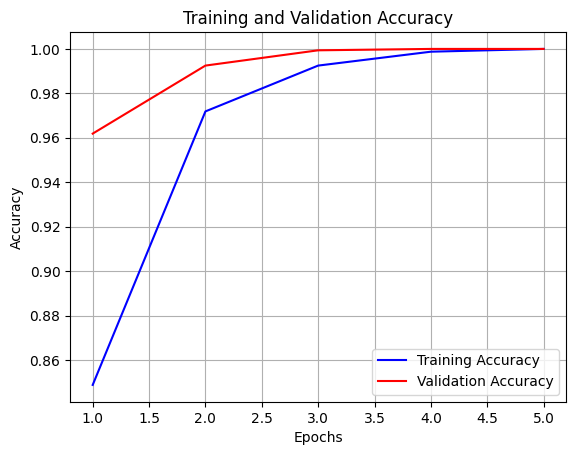

In [58]:
# plot training VS validation accuracy 
history = classifier.history

# extract the training and validation accuracy values
training_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# get the number of epochs
epochs = range(1, len(training_acc) + 1)

# plot the training and validation accuracy curves
plt.plot(epochs, training_acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(visible=True, which='both', axis='both')

plt.show()

# detect the epoch where training accuracy surpasses validation accuracy
for epoch, (acc, val_acc) in enumerate(zip(training_acc, val_acc)):
    if acc > val_acc:
        print(f"Training accuracy surpasses validation accuracy at epoch {epoch + 1}")
        break

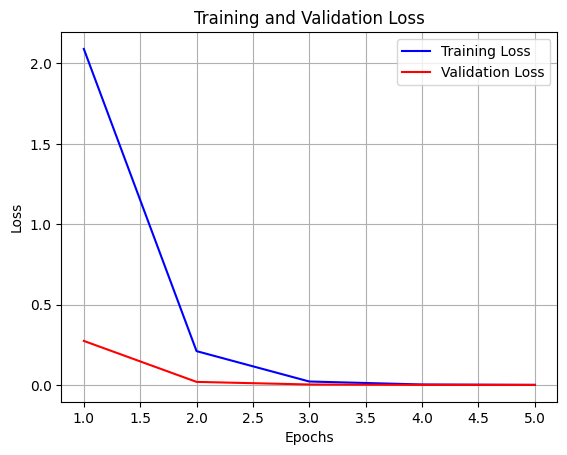

In [59]:
# plot training VS validation loss 
history2 = classifier.history

# extract the training and validation accuracy values
training_loss = history2.history['loss']
val_loss = history2.history['val_loss']

# get the number of epochs
epochs = range(1, len(training_acc) + 1)

# plot the training and validation accuracy curves
plt.plot(epochs, training_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(visible=True, which='both', axis='both')

plt.show()

What is your accuracy this time? This time the first epoch is 94% for the validation accuracy, which is almost 20% units higher. 

If the accuracy is different from when you trained your previous CNN, what do you think is the reason for the difference? The improvement in accuracy can stem from a number of different sources. However, since the same head or number of classifier-part is applied, this source can be ruled out from affecting the result. Firstly we assume that the larger size of the data the VGG-model has been trained on should give rise to improvements, despite training on the same data set here during the specialized training, the weights have been loaded from the pre-training and part of that knowledge has been transferred. Models like thses need huge sets of data to be properly trained. 

Secondly, the VGG-model is deeper and has probably been trained and exposed to a larger variety of pictures. With the feature extraction from the VGG-model the model [...] 

## Part 4: Visualizing the learned features

In [11]:
#visualization of the low level pattern from the CNN

#fetch the weights. A tensor of dim: width x height x colors x number of convolutions.
first_layer_weights = vggmodel.get_weights()[0]
print(first_layer_weights.shape)

def kernel_image(weights, i, positive):
    
    # extract the convolutional kernel at position i
    k = weights[:,:,:,i].copy()
    if not positive:
        k = -k
    
    # clip the values: if we're looking for positive
    # values, just keep the positive part; vice versa
    # for the negative values.
    k *= k > 0

    # rescale the colors, to make the images less dark
    m = k.max()
    if m > 1e-3:
        k /= m 

    return k

(3, 3, 3, 64)


In [36]:
#index_range = list(range(0,63, 8)) # even investigation of the 64 filters
#index_range = list(range(8)) # first 8 
index_range = list(range(55,63)) #last 8
index_range

[55, 56, 57, 58, 59, 60, 61, 62]

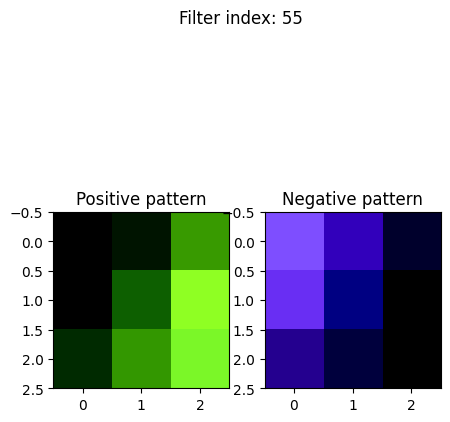

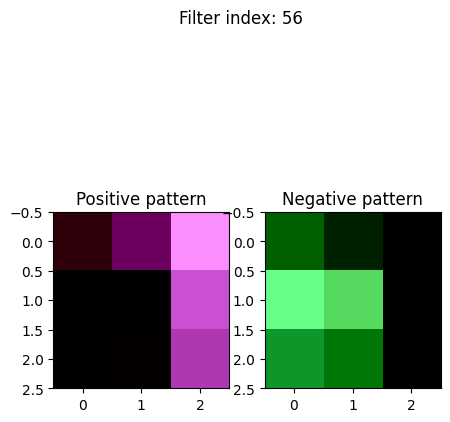

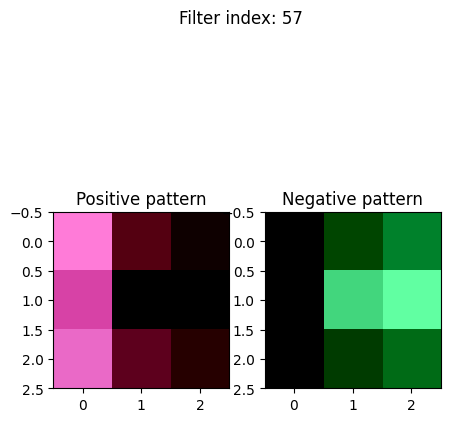

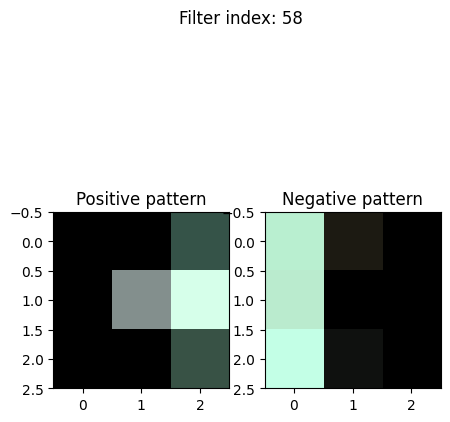

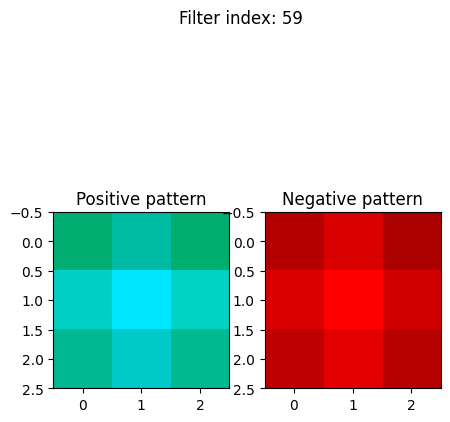

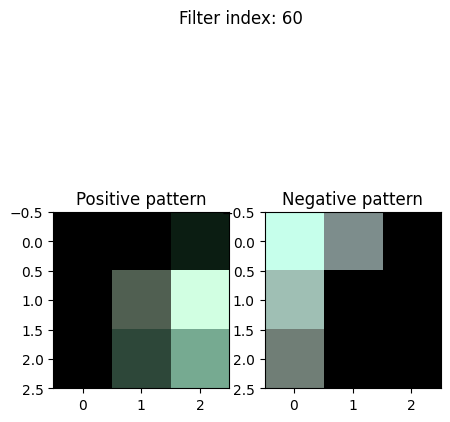

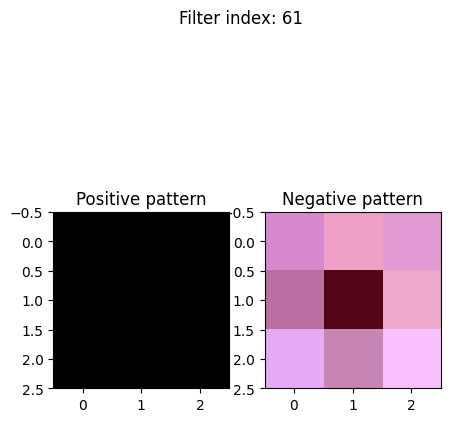

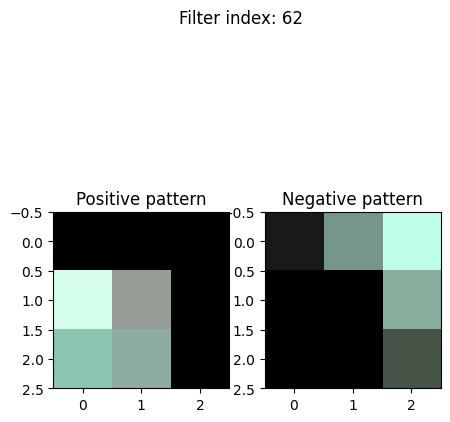

In [41]:
for i in index_range:
    #get pairs
    pos_weight_tensor = kernel_image(first_layer_weights, i, True)
    neg_weight_tensor= kernel_image(first_layer_weights, i, False)
    #plot pairs
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (5,6))
    fig.suptitle('Filter index: ' + str(i))
    ax1.imshow(pos_weight_tensor)
    ax1.set_title("Positive pattern")
    ax2.imshow(neg_weight_tensor)
    ax2.set_title("Negative pattern")
        
    fig.show()


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=9a2f6166-b39d-417b-9119-b5ef86702171' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>